# Serie Image processing: post 4, Transformations

In [9]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure, transform
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Rotation

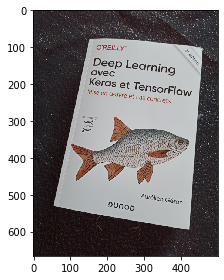

In [10]:
image = imread('book.jpg')
imshow(image)

In [28]:
tr = transform.SimilarityTransform(scale=1, rotation=math.pi/20)
print (tr)

<SimilarityTransform(matrix=
    [[ 0.98768834, -0.15643447,  0.        ],
     [ 0.15643447,  0.98768834,  0.        ],
     [ 0.        ,  0.        ,  1.        ]])>


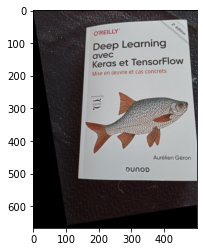

In [38]:
image_tr_1 = transform.warp(image, tr)
plt.imshow(image_tr_1)